<a href="https://colab.research.google.com/github/mikehviz/Product-Profit-Forecasting/blob/main/Product_Stock_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

#install.packages("tseries")
#install.packages("forecast")
#install.packages("lubridate")
library(tseries)
library(forecast)
library(lubridate)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
#this is the data set of sales 2013-2018
Sales <- read.csv("https://docs.google.com/spreadsheets/d/1f5wVYwsnSpCfTorarfbOyweysYj_5mkUprJdyT-HQ3Q/export?format=csv")
head(Sales, 3)


,date,store,item,sales
,<chr>,<int>,<int>,<int>
1,2013-01-01,1,1,13
2,2013-01-02,1,1,11
3,2013-01-03,1,1,14


In [ ]:
Sales$date <- as.Date(Sales$date)   
class(Sales$date)

[1] "Date"

In [ ]:
head(Sales, 30)

,date,store,item,sales
,<date>,<int>,<int>,<int>
1,2013-01-01,1,1,13
2,2013-01-02,1,1,11
3,2013-01-03,1,1,14
4,2013-01-04,1,1,13
5,2013-01-05,1,1,10
6,2013-01-06,1,1,12
7,2013-01-07,1,1,10
8,2013-01-08,1,1,9
9,2013-01-09,1,1,12


In [ ]:
min(Sales$date, na.rm = TRUE)

max(Sales$date, na.rm = TRUE)

range(Sales$date, na.rm = TRUE)


[1] "2013-01-01"

[1] "2017-12-31"

[1] "2013-01-01" "2017-12-31"

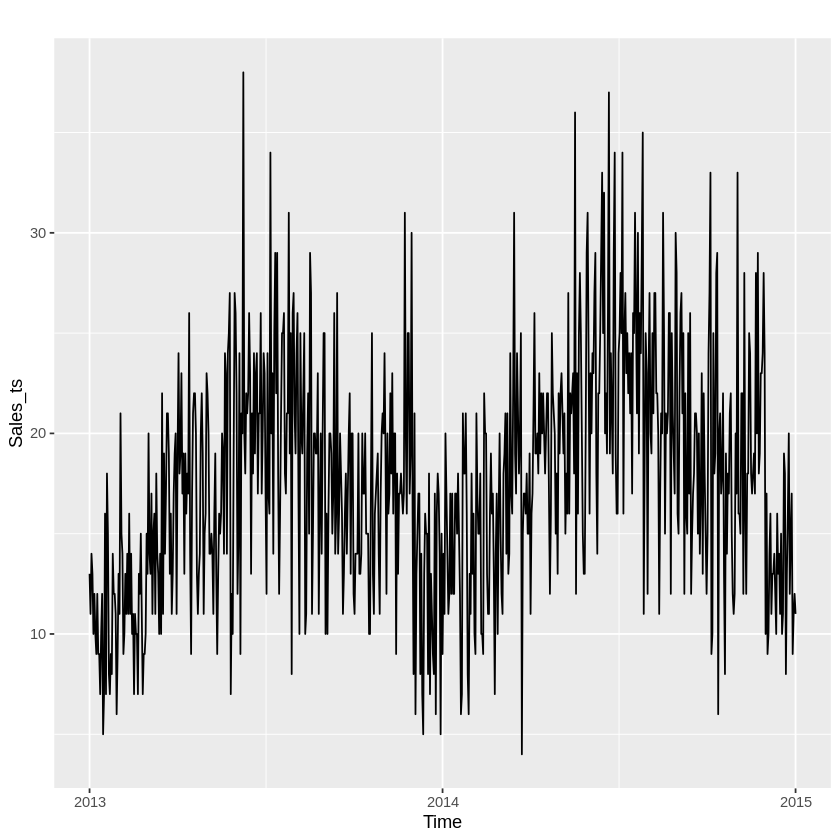

In [ ]:
#we have to save the 2013 sales to a time series so it can be plotted
Sales_ts <- ts(Sales$sales, start=c(2013), end=c(2015), frequency = 365) 
autoplot(Sales_ts)

In [ ]:
#non-stationary(it flucates too much)
adf.test(Sales_ts, k=12)


	Augmented Dickey-Fuller Test

data:  Sales_ts
Dickey-Fuller = -3.0382, Lag order = 12, p-value = 0.1388
alternative hypothesis: stationary


In [ ]:
#first level difference test is stationary!
Sales_ts_1 <- diff(Sales_ts, differences = 1)
adf.test(Sales_ts_1, k=12)

Warning message in adf.test(Sales_ts_1, k = 12):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  Sales_ts_1
Dickey-Fuller = -12.905, Lag order = 12, p-value = 0.01
alternative hypothesis: stationary


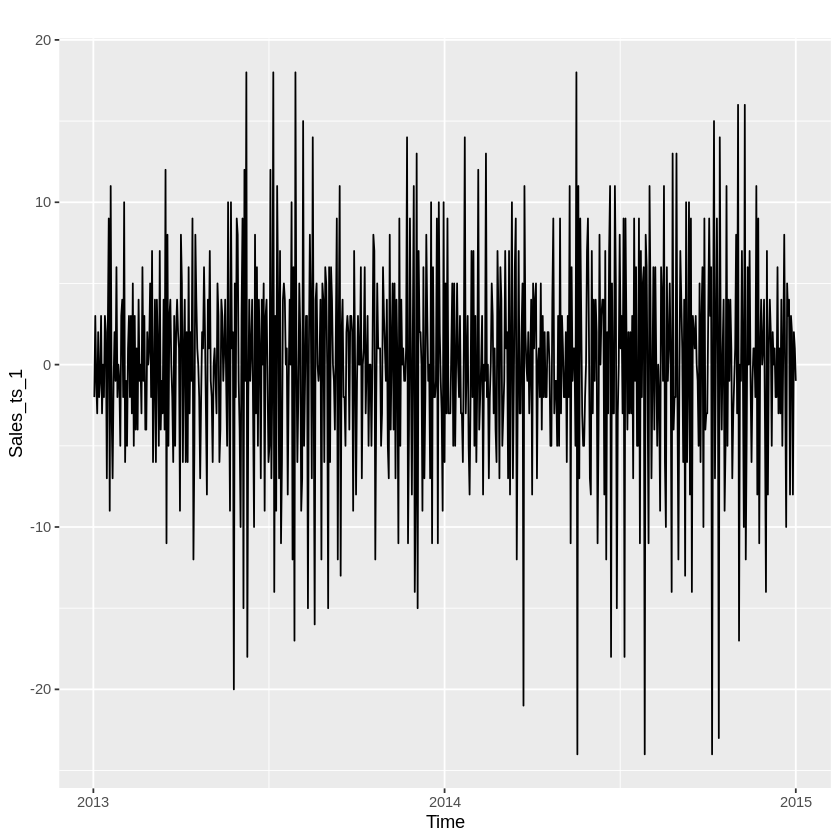

In [ ]:
autoplot(Sales_ts_1)

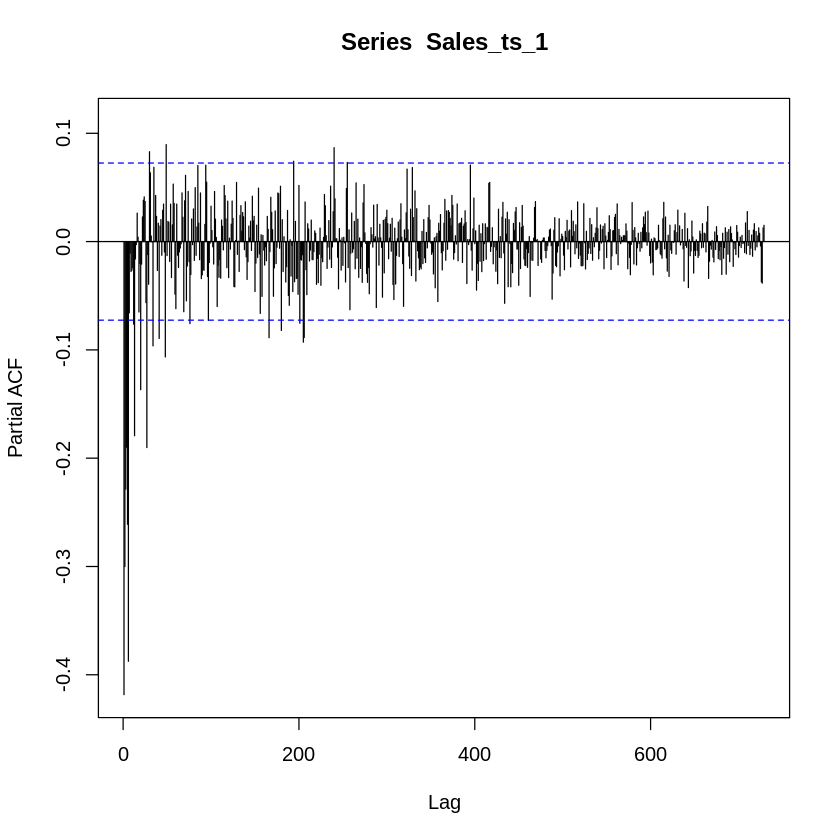

In [ ]:
Pacf(Sales_ts_1)

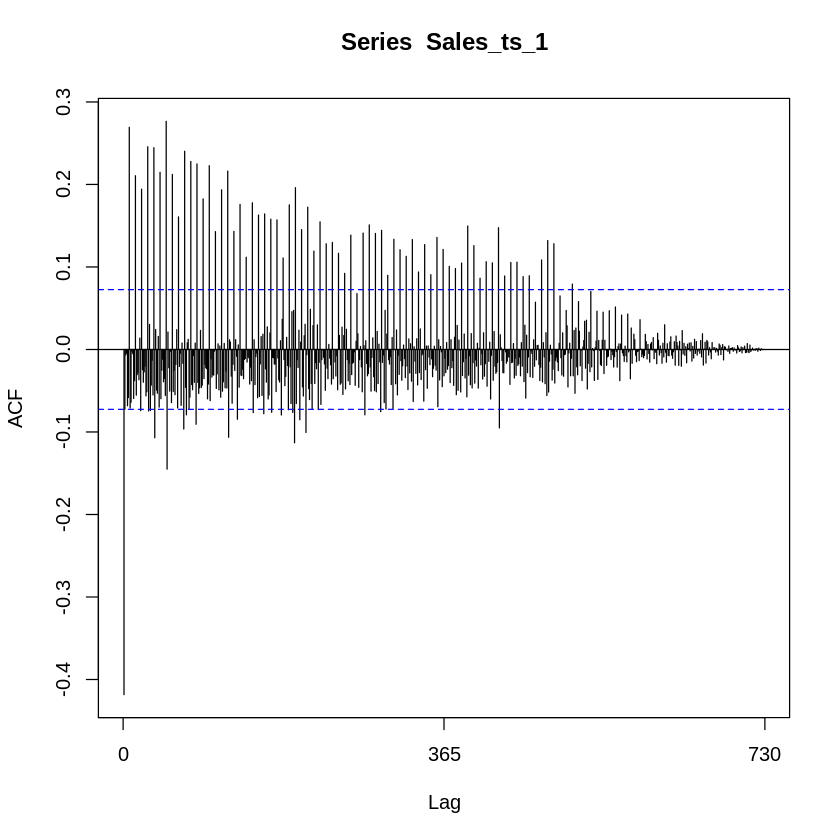

In [ ]:
Acf(Sales_ts_1)

In [ ]:
tsMod <- Arima(y = Sales_ts, order = c(31,1,4))
print(tsMod)

Series: Sales_ts 
ARIMA(31,1,4) 

Coefficients:
          ar1      ar2      ar3      ar4      ar5      ar6      ar7      ar8
      -1.1496  -0.9590  -1.3879  -1.9401  -1.7887  -1.6541  -1.3098  -1.1615
s.e.   0.0885   0.0843   0.0871   0.1364   0.1486   0.1615   0.1653   0.1643
          ar9     ar10     ar11     ar12     ar13     ar14     ar15     ar16
      -1.1523  -0.9486  -0.7267  -0.7270  -0.7044  -0.5619  -0.5263  -0.5350
s.e.   0.1717   0.1760   0.1733   0.1747   0.1774   0.1774   0.1763   0.1769
         ar17     ar18     ar19     ar20     ar21     ar22     ar23     ar24
      -0.4809  -0.4135  -0.3416  -0.3426  -0.2945  -0.2092  -0.2029  -0.2086
s.e.   0.1768   0.1755   0.1742   0.1722   0.1703   0.1669   0.1609   0.1552
         ar25     ar26     ar27     ar28     ar29     ar30     ar31     ma1
      -0.1685  -0.2336  -0.2501  -0.0880  -0.1301  -0.1292  -0.0755  0.2940
s.e.   0.1476   0.1346   0.1180   0.0935   0.0725   0.0607   0.0488  0.0853
          ma2     ma3     ma4
 

In [ ]:
forecast(tsMod, h=12)

          Point Forecast     Lo 80    Hi 80    Lo 95    Hi 95
2015.0027       13.31356  7.550850 19.07626 4.500257 22.12685
2015.0055       16.76289 10.940470 22.58532 7.858265 25.66752
2015.0082       15.68161  9.851025 21.51220 6.764500 24.59872
2015.0110       11.53515  5.663950 17.40636 2.555922 20.51438
2015.0137       10.39738  4.463786 16.33097 1.322731 19.47203
2015.0164       11.95137  6.010988 17.89175 2.866342 21.03639
2015.0192       12.72452  6.758148 18.69090 3.599739 21.84931
2015.0219       13.54752  7.426964 19.66808 4.186936 22.90811
2015.0247       16.25258 10.103371 22.40179 6.848177 25.65698
2015.0274       15.56811  9.412474 21.72375 6.153877 24.98234
2015.0301       12.28129  6.073656 18.48892 2.787534 21.77504
2015.0329       10.74325  4.471236 17.01527 1.151031 20.33547

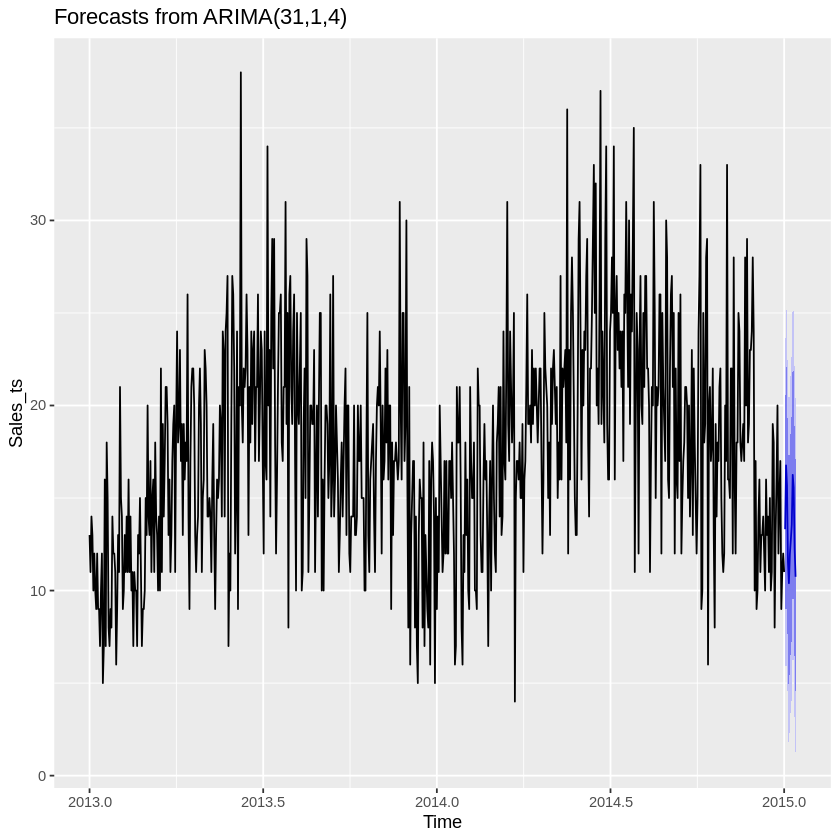

In [ ]:
autoplot(forecast(tsMod,h=12))